<div class="alert alert-block alert-warning">

# Explore Exercises

<div class="alert alert-block alert-success">

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.


In [12]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split

from wrangle import acquire_zillow, get_zillow_data, wrangle_zillow, split_train_val_test

from explore import plot_variable_pairs, plot_categorical_and_continuous_vars

import os

<div class="alert alert-block alert-success">

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.


<div class="alert alert-block alert-info">

1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.


In [2]:
df = get_zillow_data()
df = wrangle_zillow(df)
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


<div class="alert alert-block alert-info">

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.


In [3]:
train, val, test = split_train_val_test(df)

train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

<div class="alert alert-block alert-info">

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.


In [4]:
train_sample = train.sample(1000)

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/jongarcia/codeup-data-science/regression-exercises/explore.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


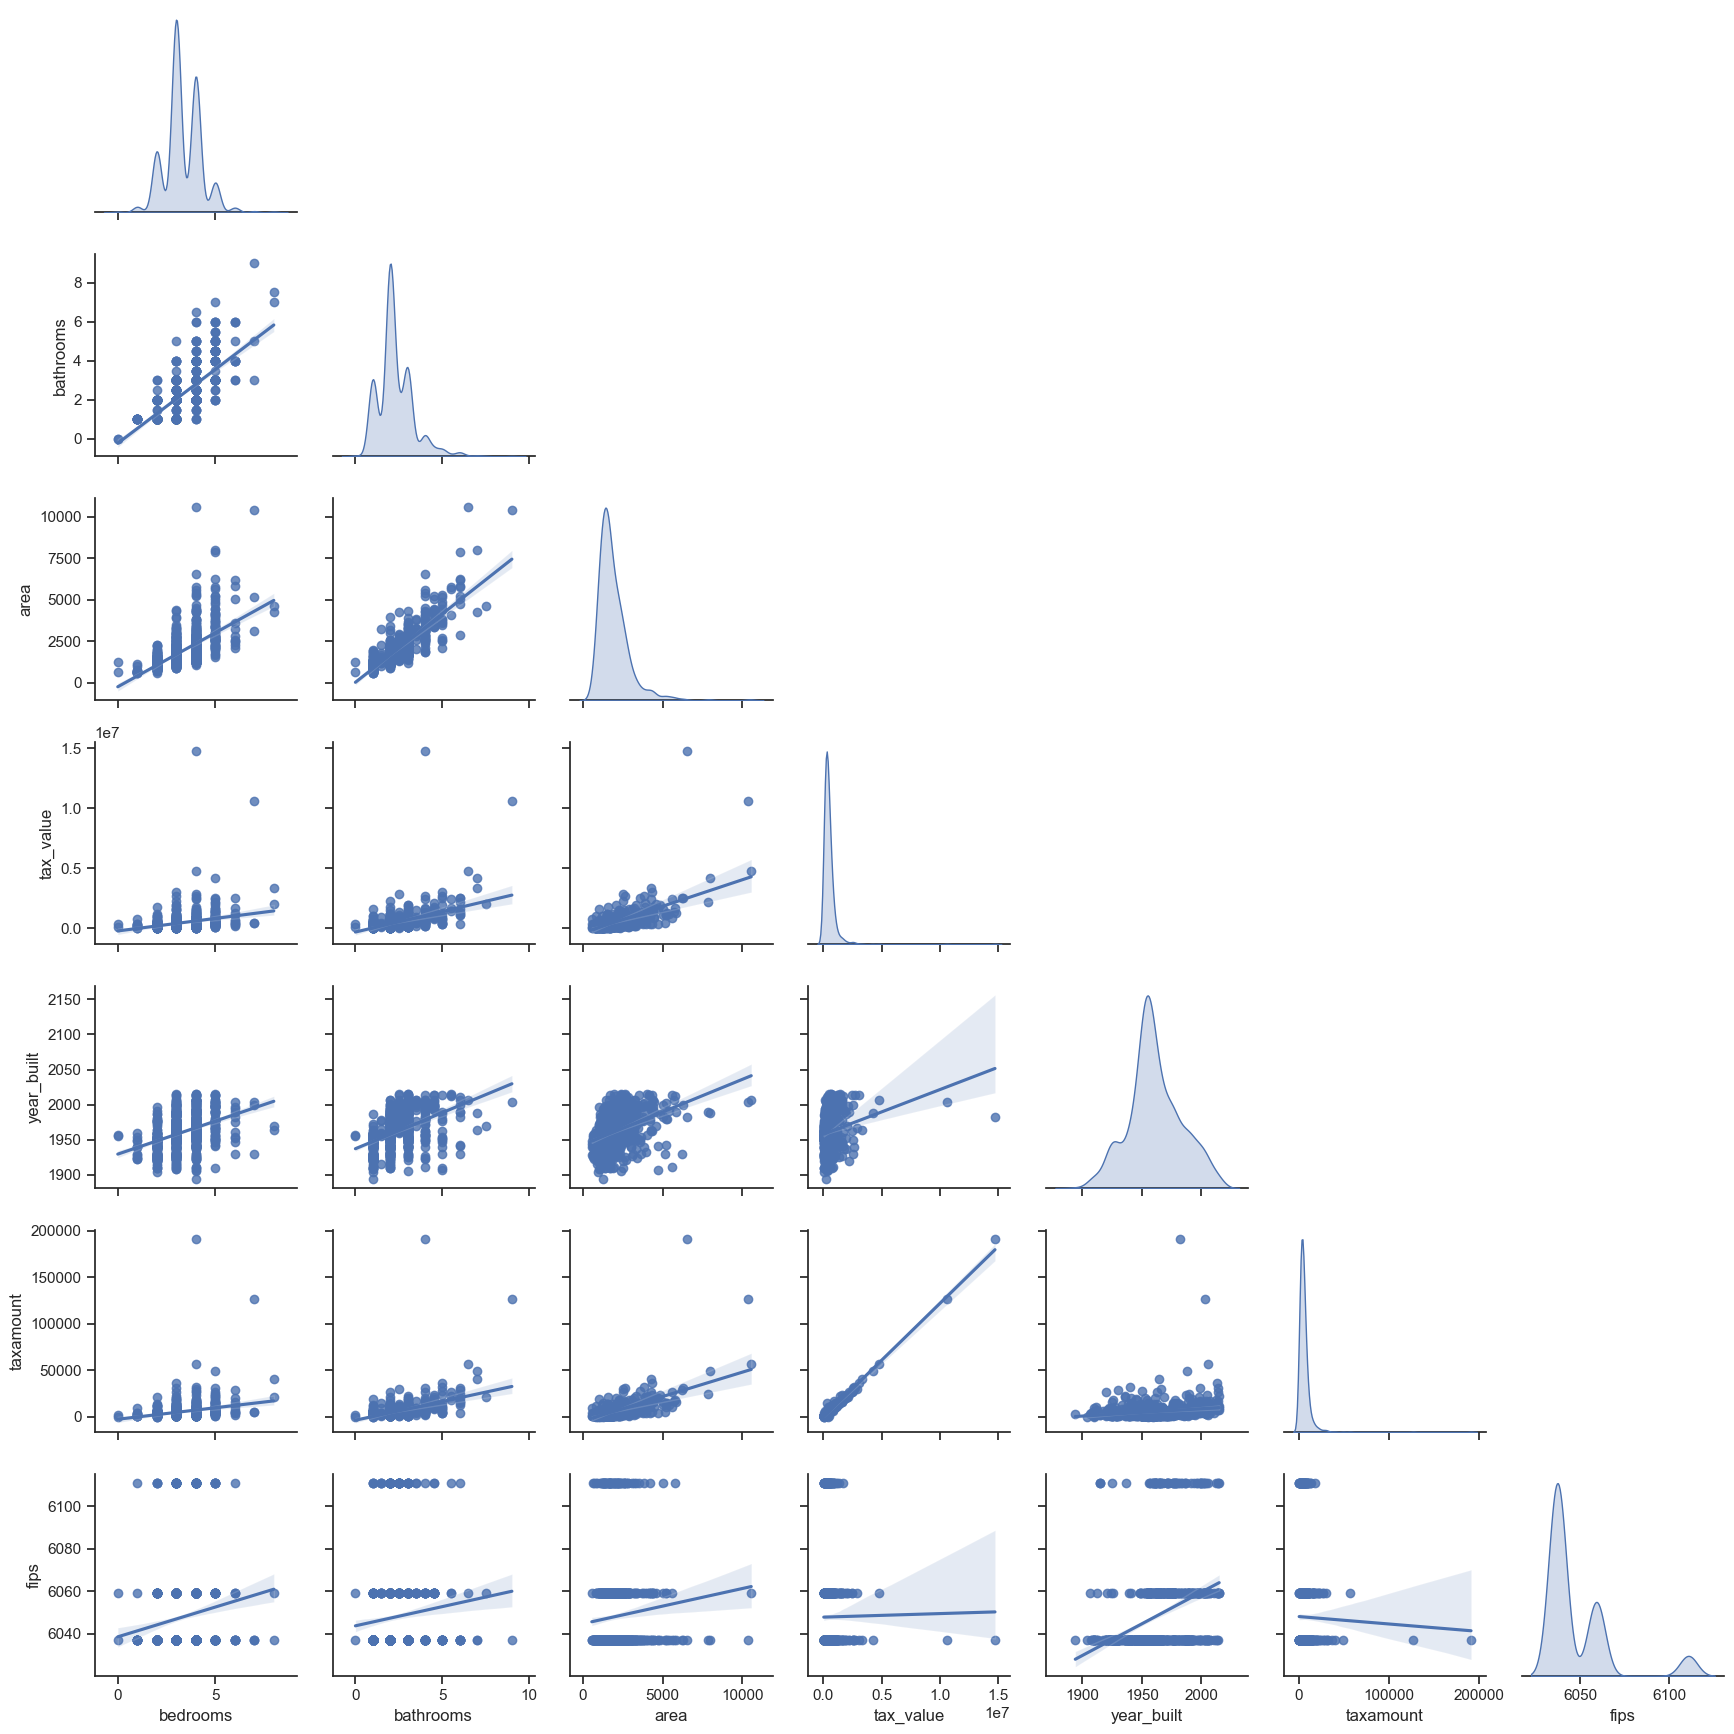

In [5]:
plot_variable_pairs(train_sample)

<div class="alert alert-block alert-info">

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.


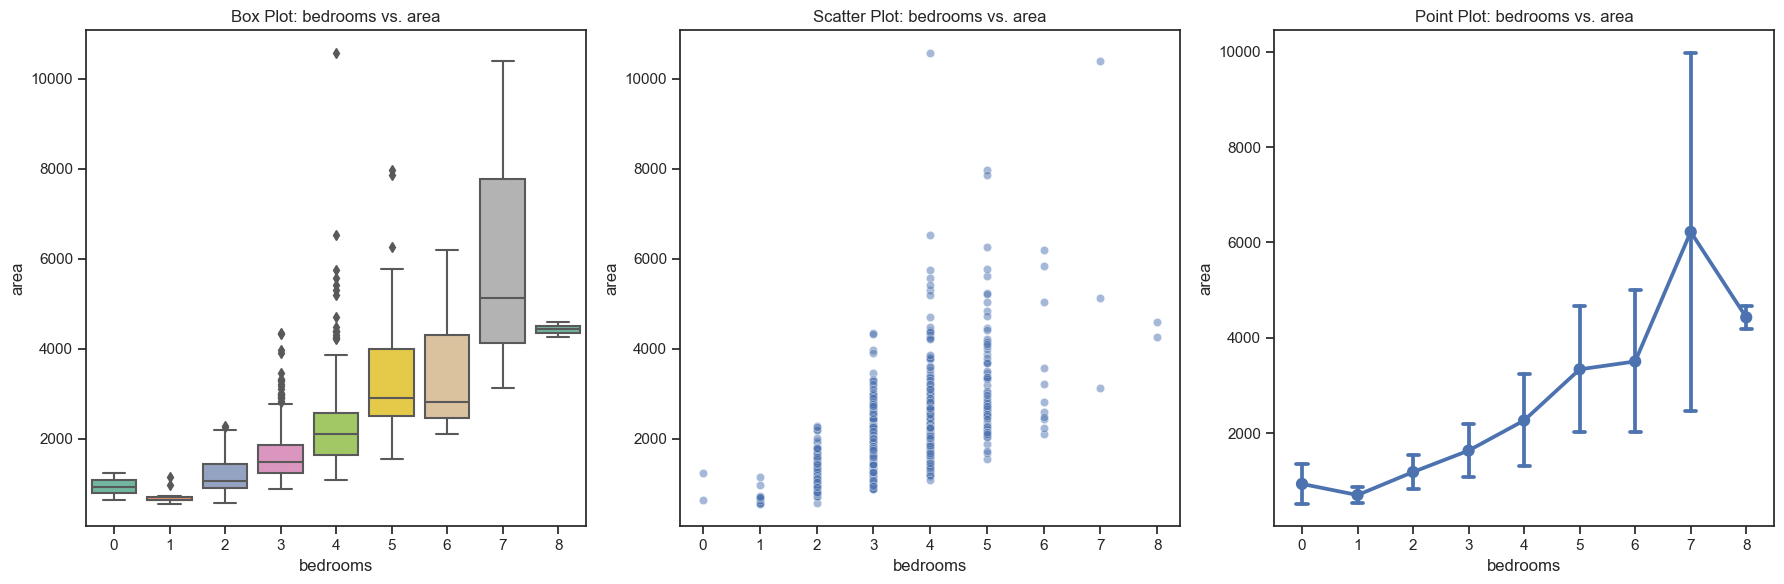

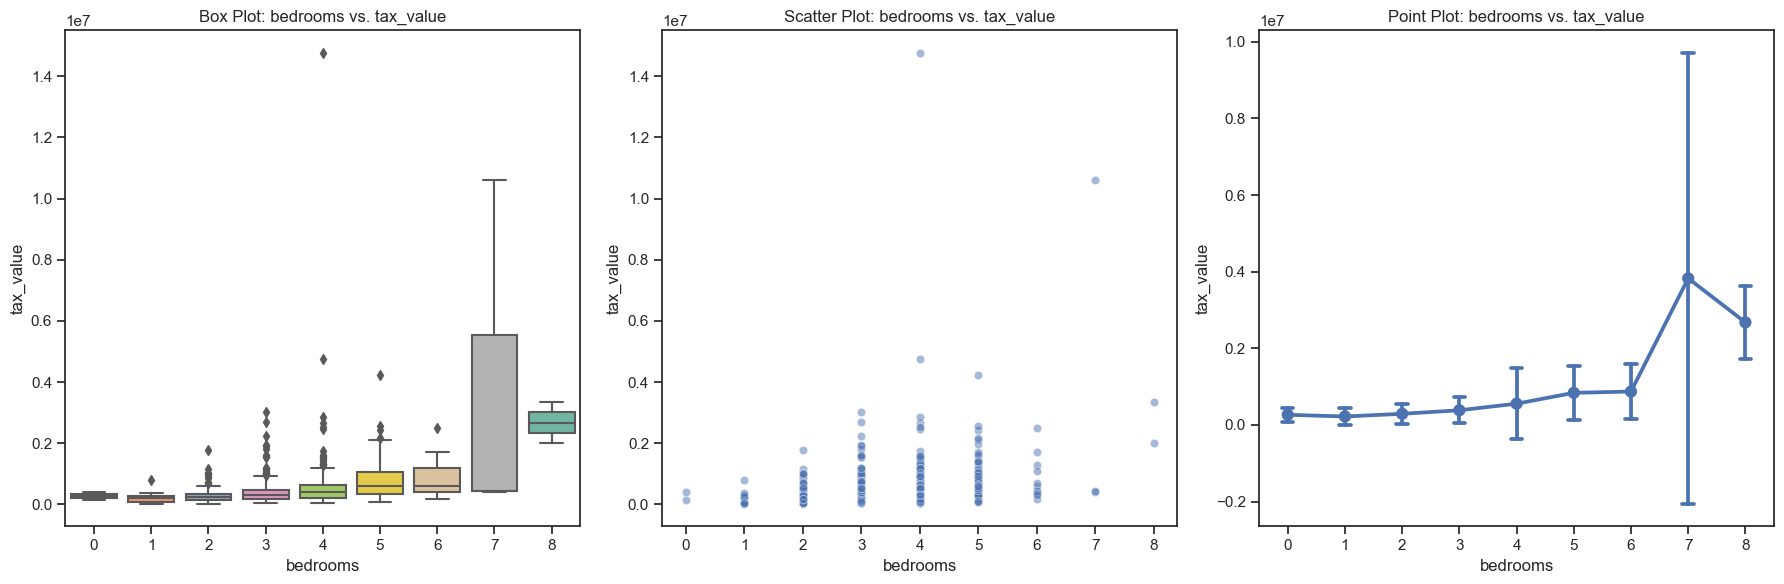

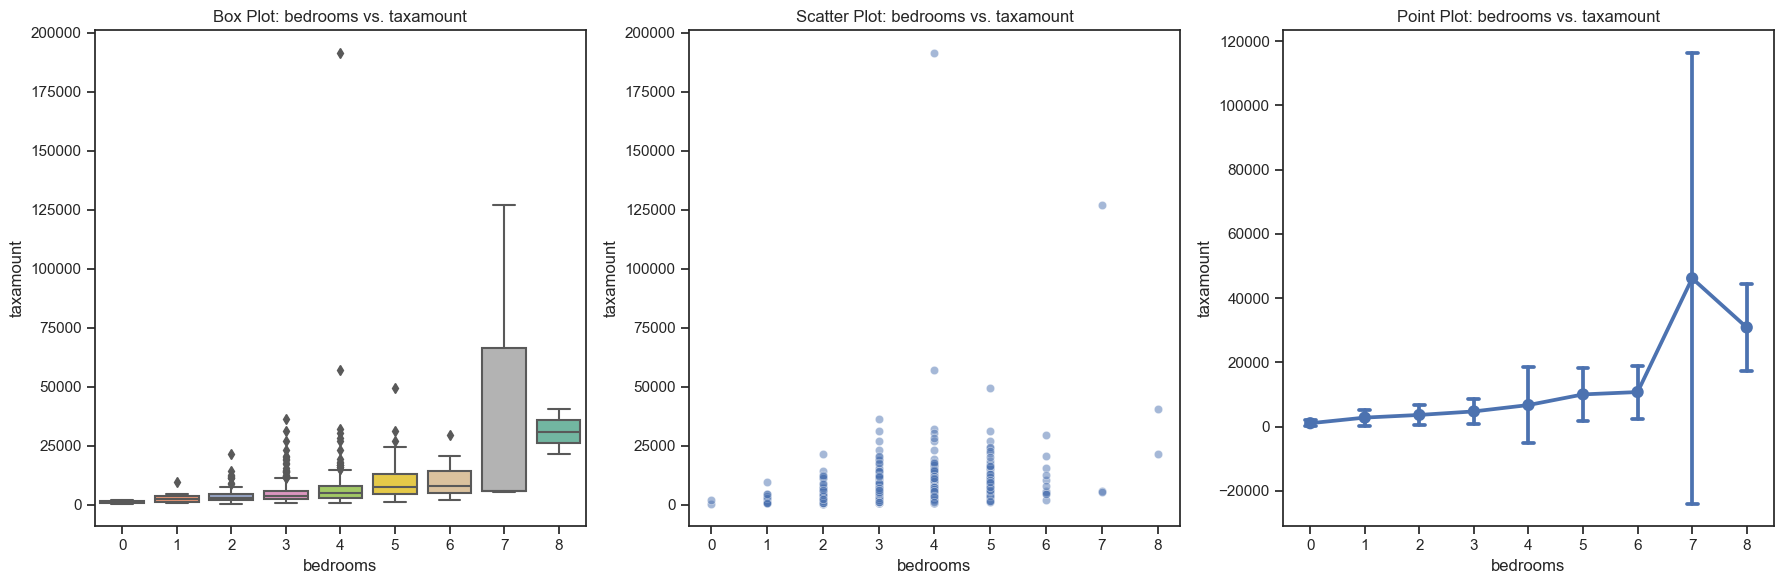

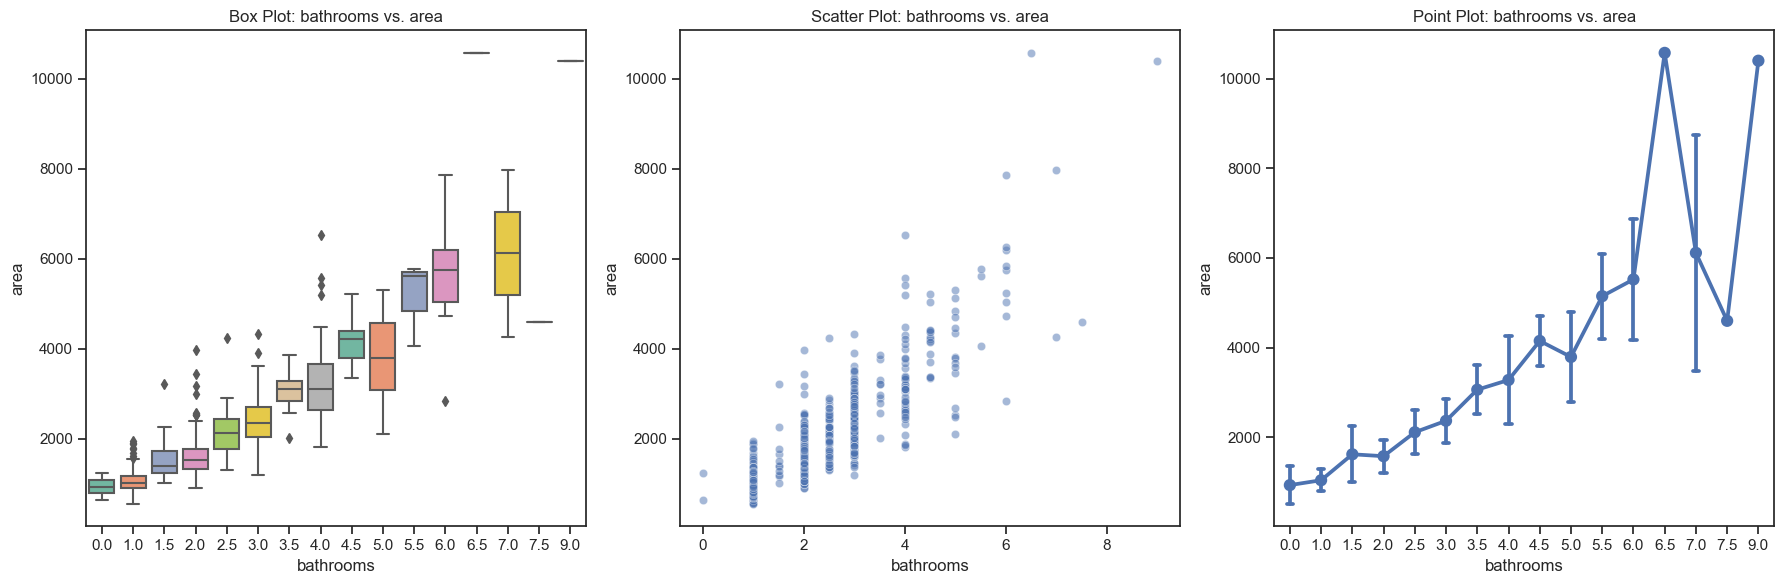

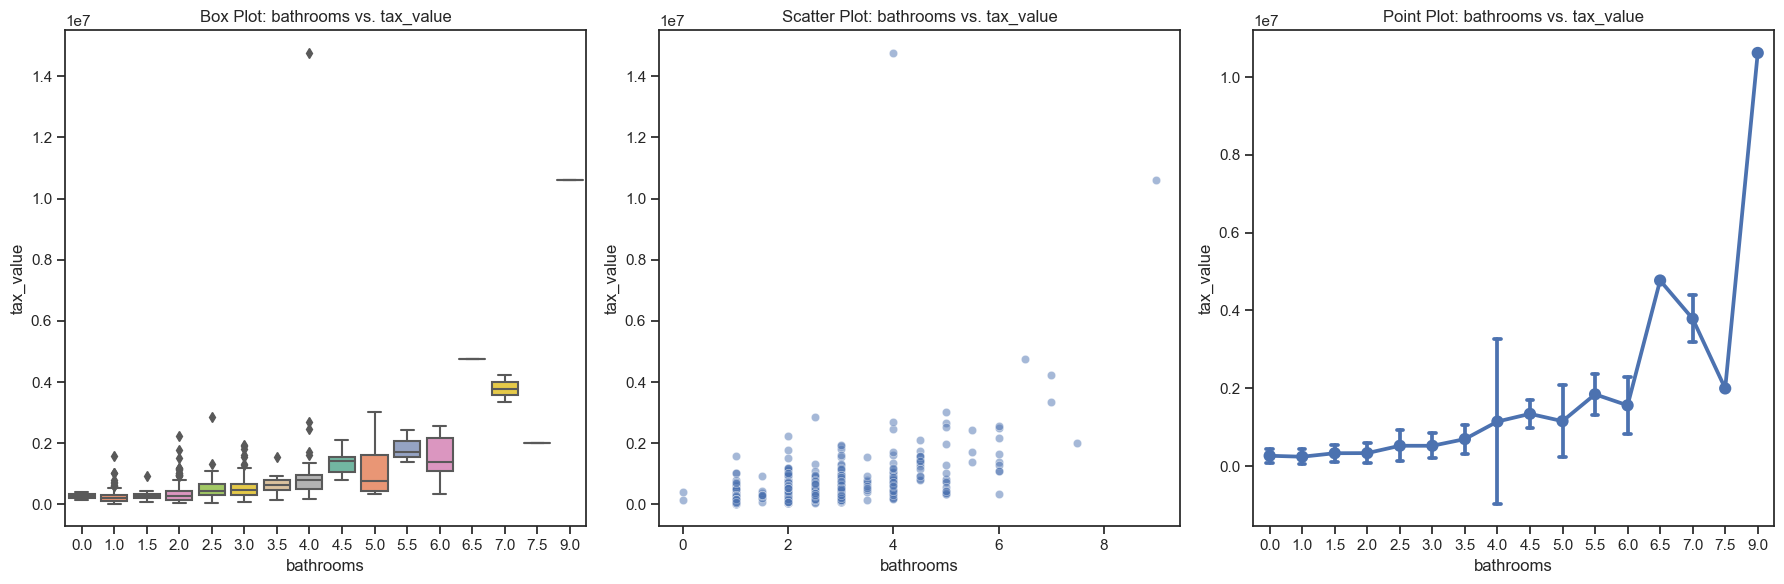

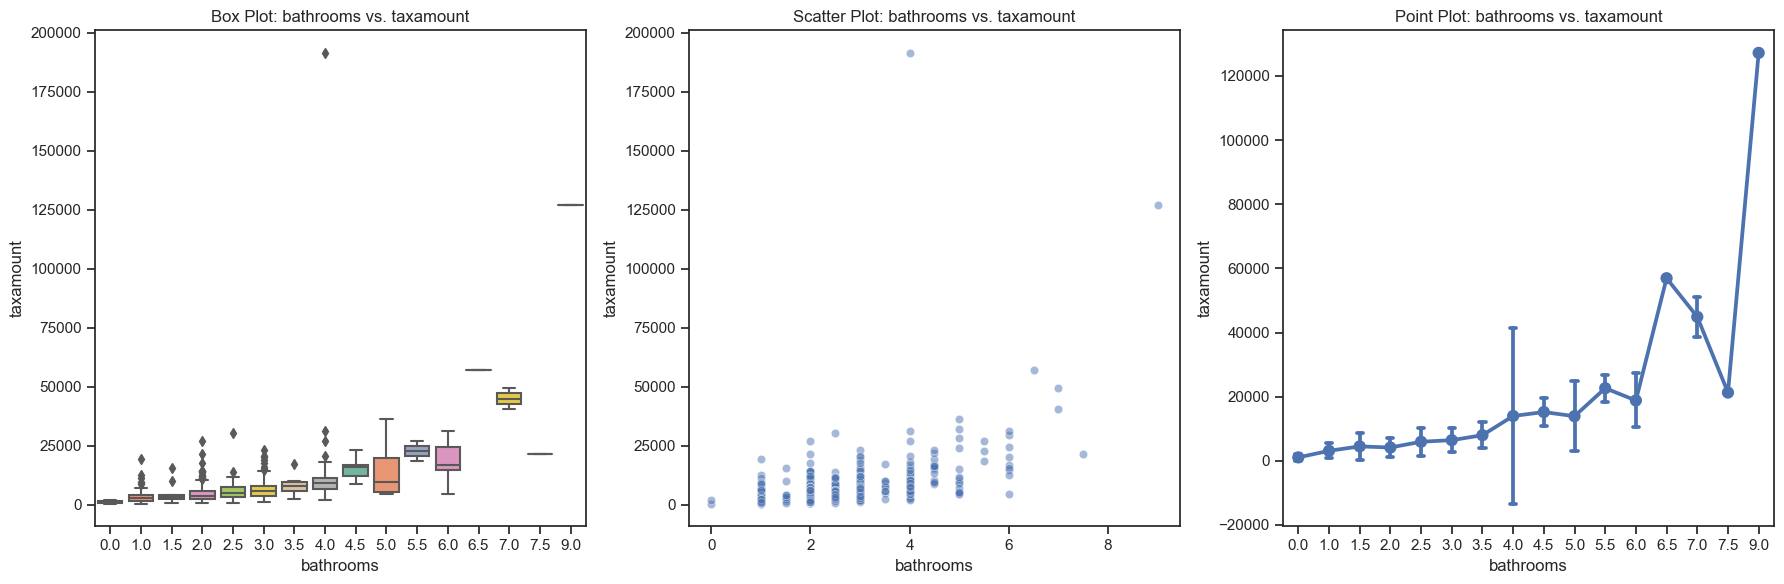

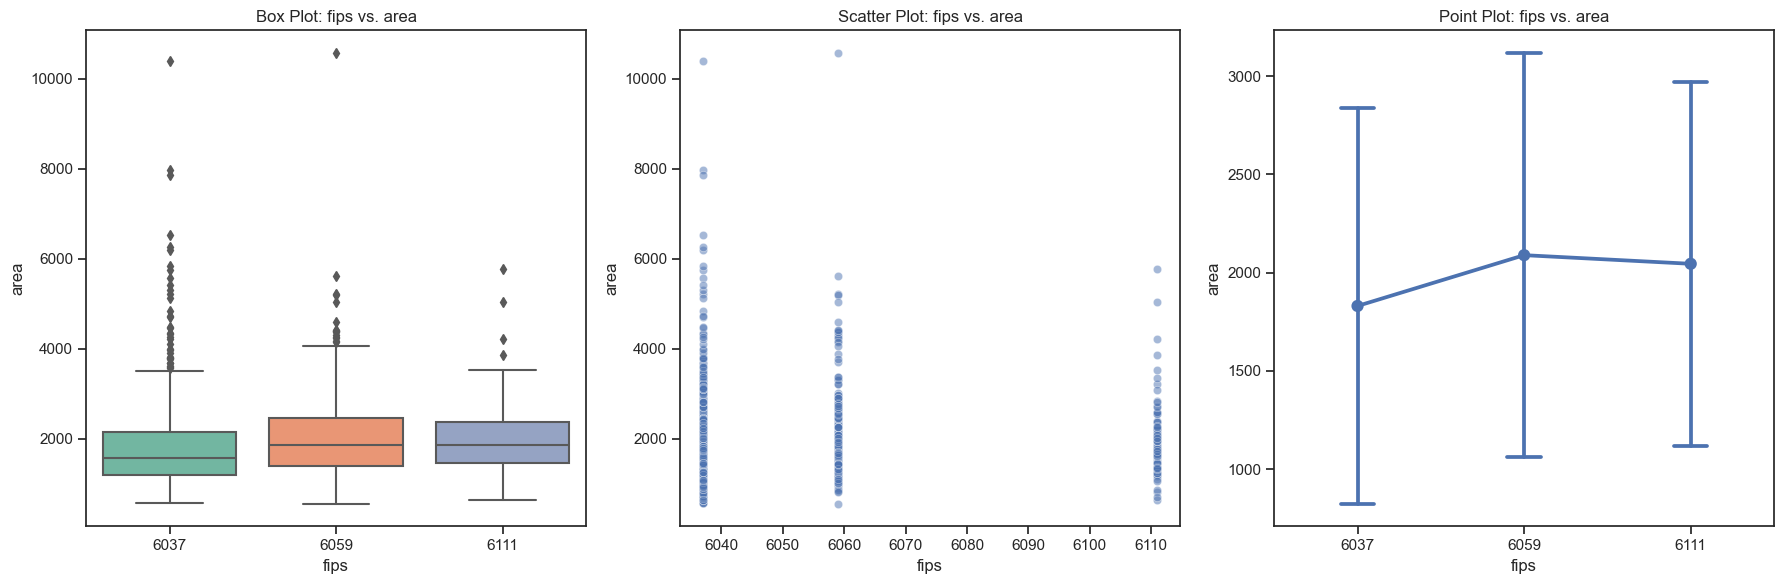

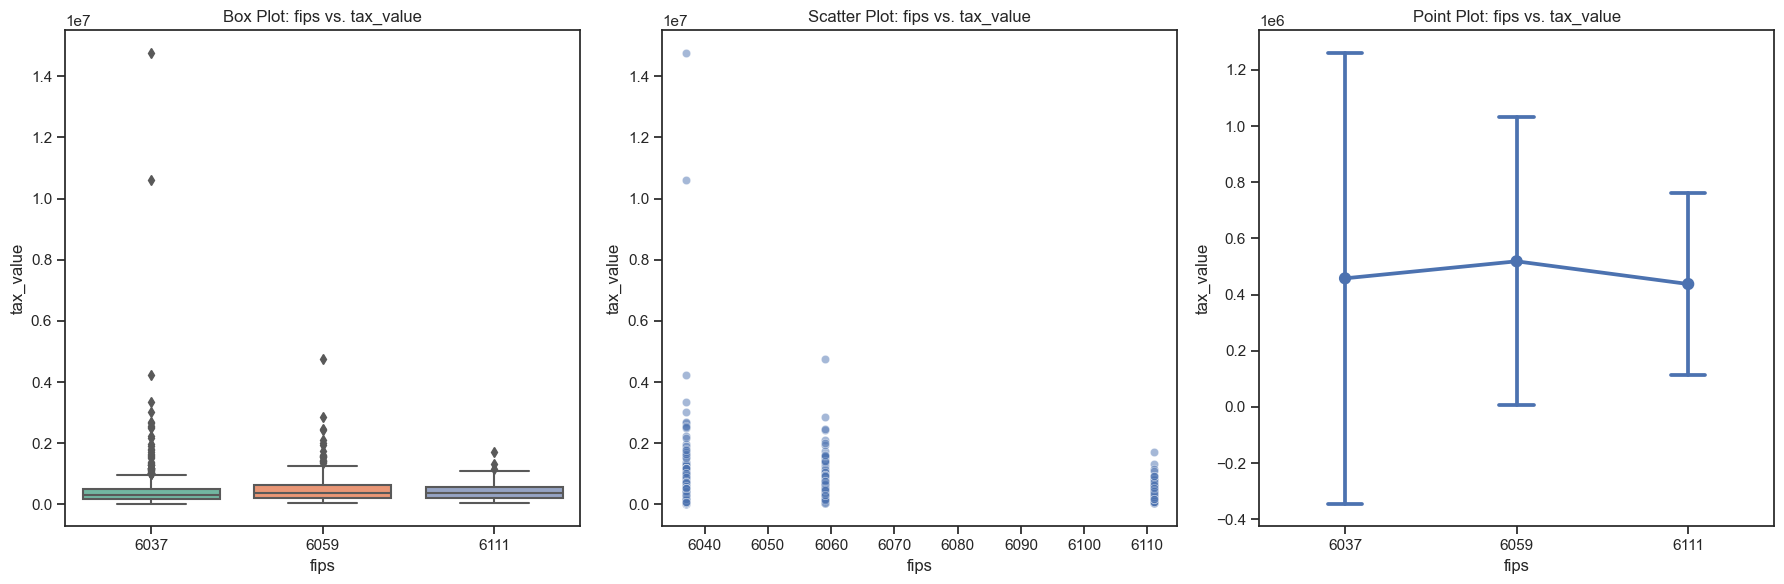

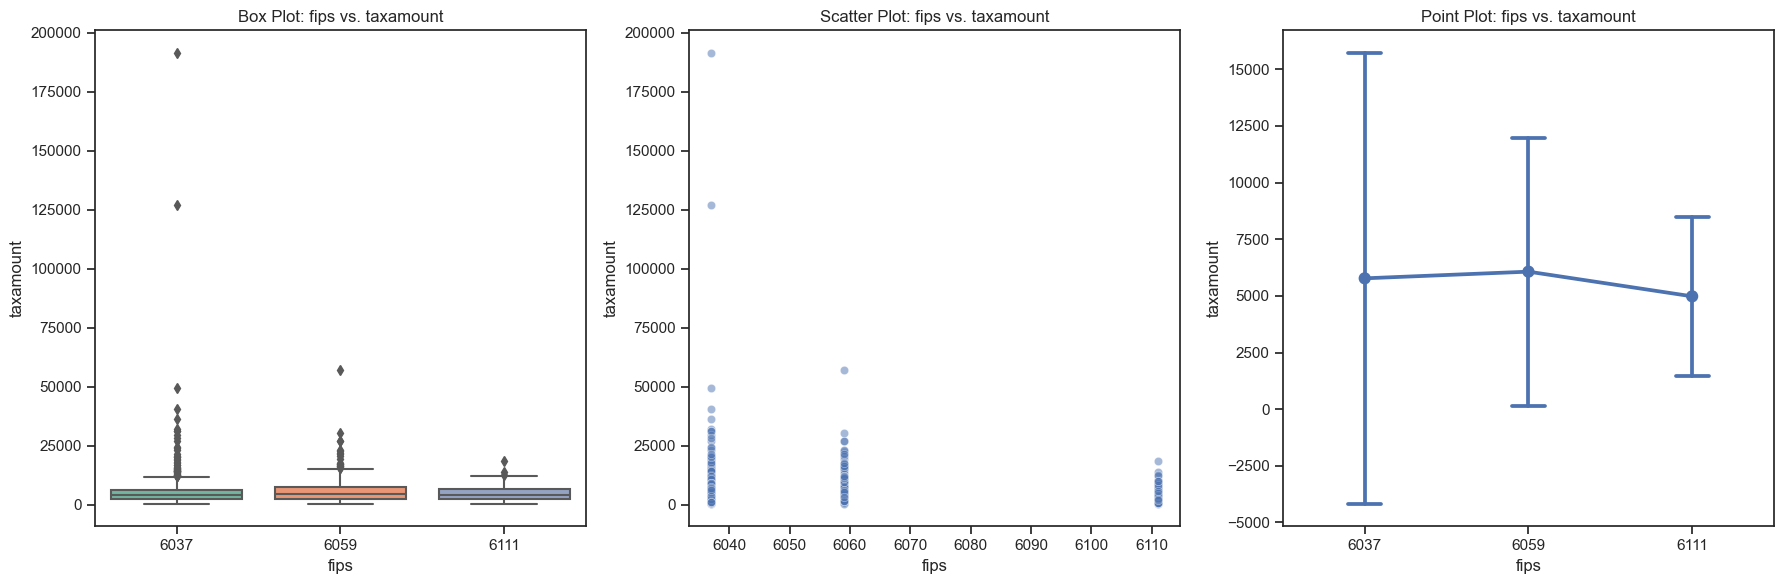

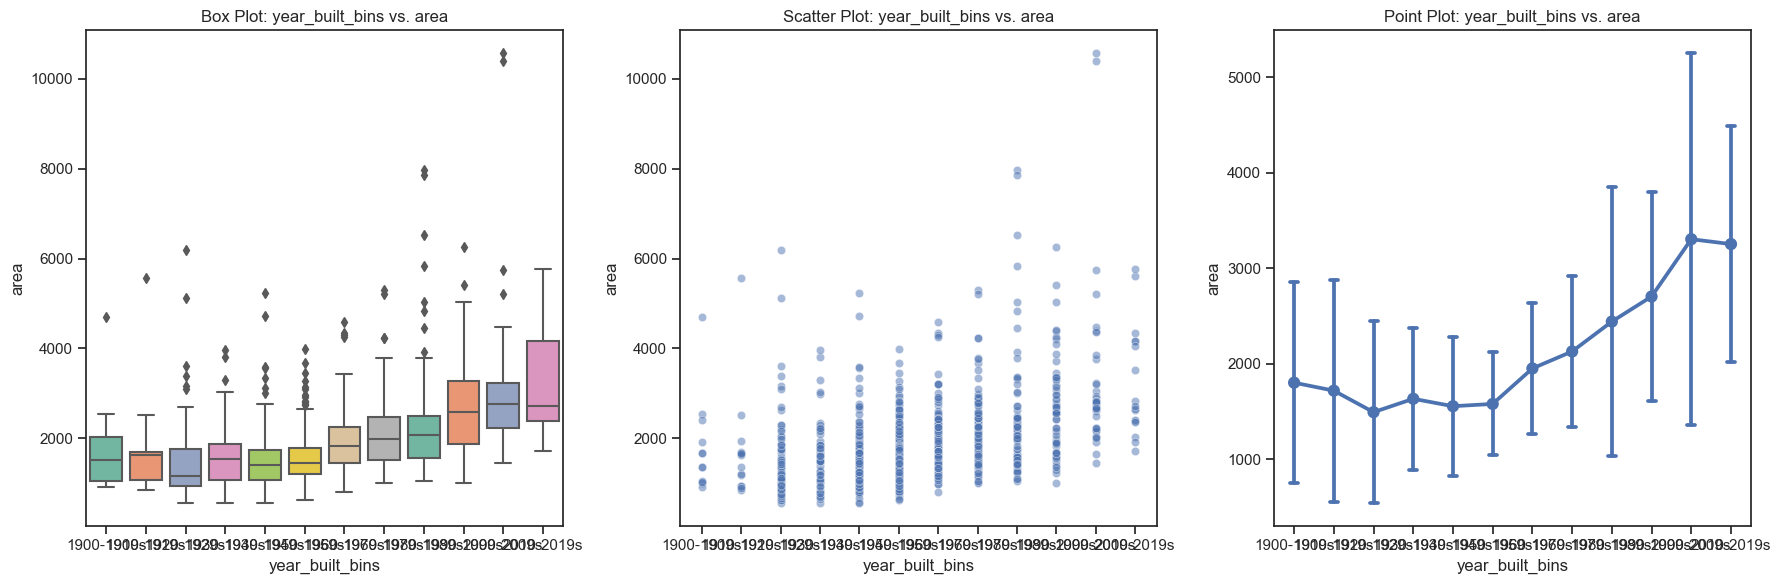

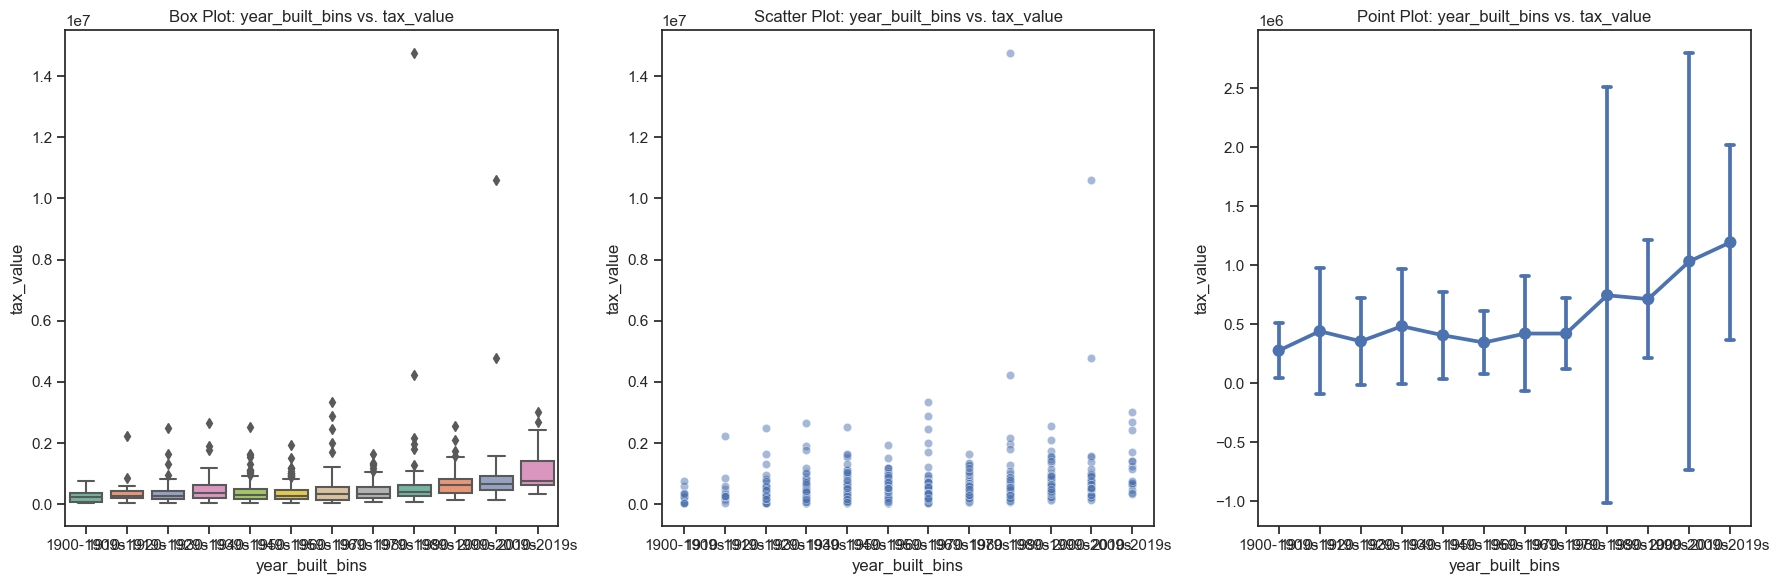

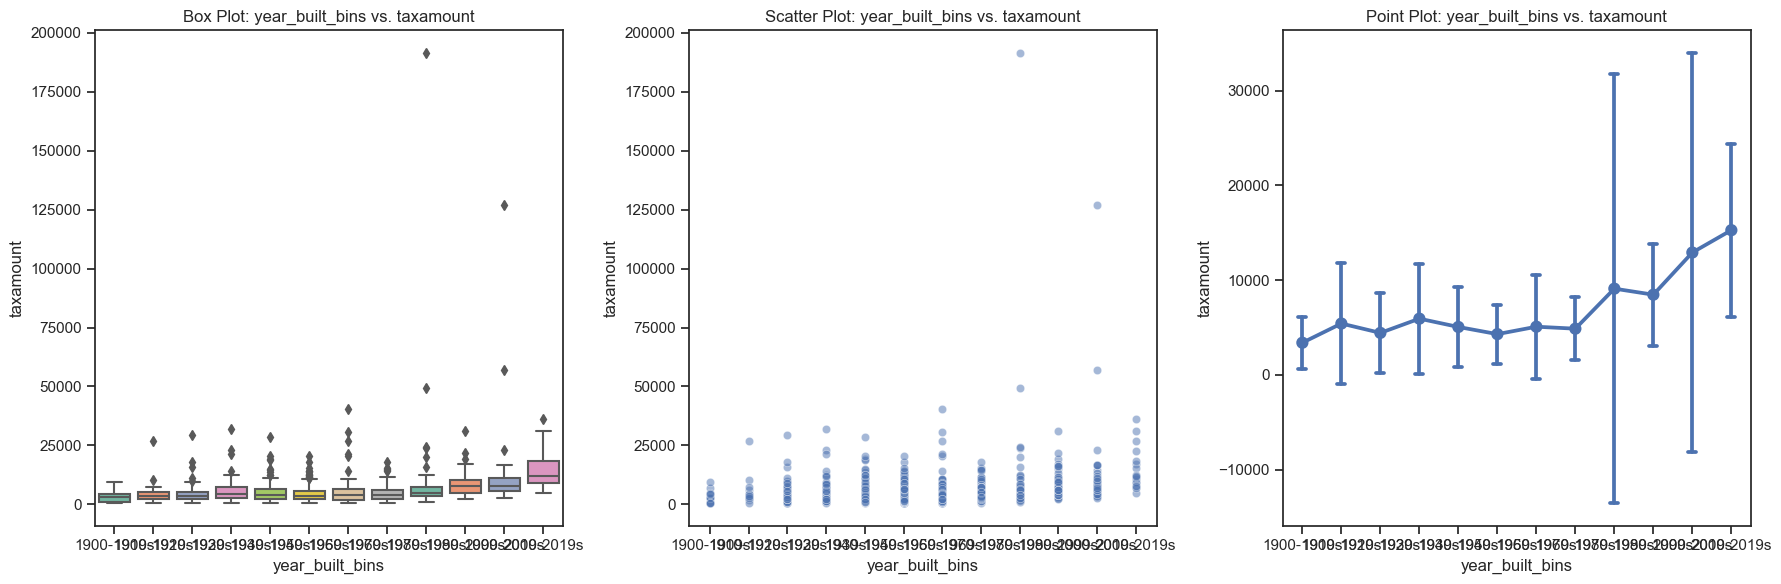

In [6]:
plot_categorical_and_continuous_vars(train_sample)

<div class="alert alert-block alert-info">

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.


In [7]:
# Completed

<div class="alert alert-block alert-info">

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.


In [8]:
# Completed, see Q3 and Q4

<div class="alert alert-block alert-info">

7. Come up with some initial hypotheses based on your goal of predicting property value.


#### Area and Value

##### Does area have a correlation with tax_value?

H0: There is a relationship between Area and Value

H1: There is no relationship between Area and Value

#### Bedrooms and Value

##### Does bedrooms have a relationship with tax_value?

H0: There is a relationship between Bedrooms and Value

H1: There is no relationship between Bedrooms and Value

<div class="alert alert-block alert-info">

8. Visualize all combinations of variables in some way.


/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/jongarcia/codeup-data-science/regression-exercises/explore.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


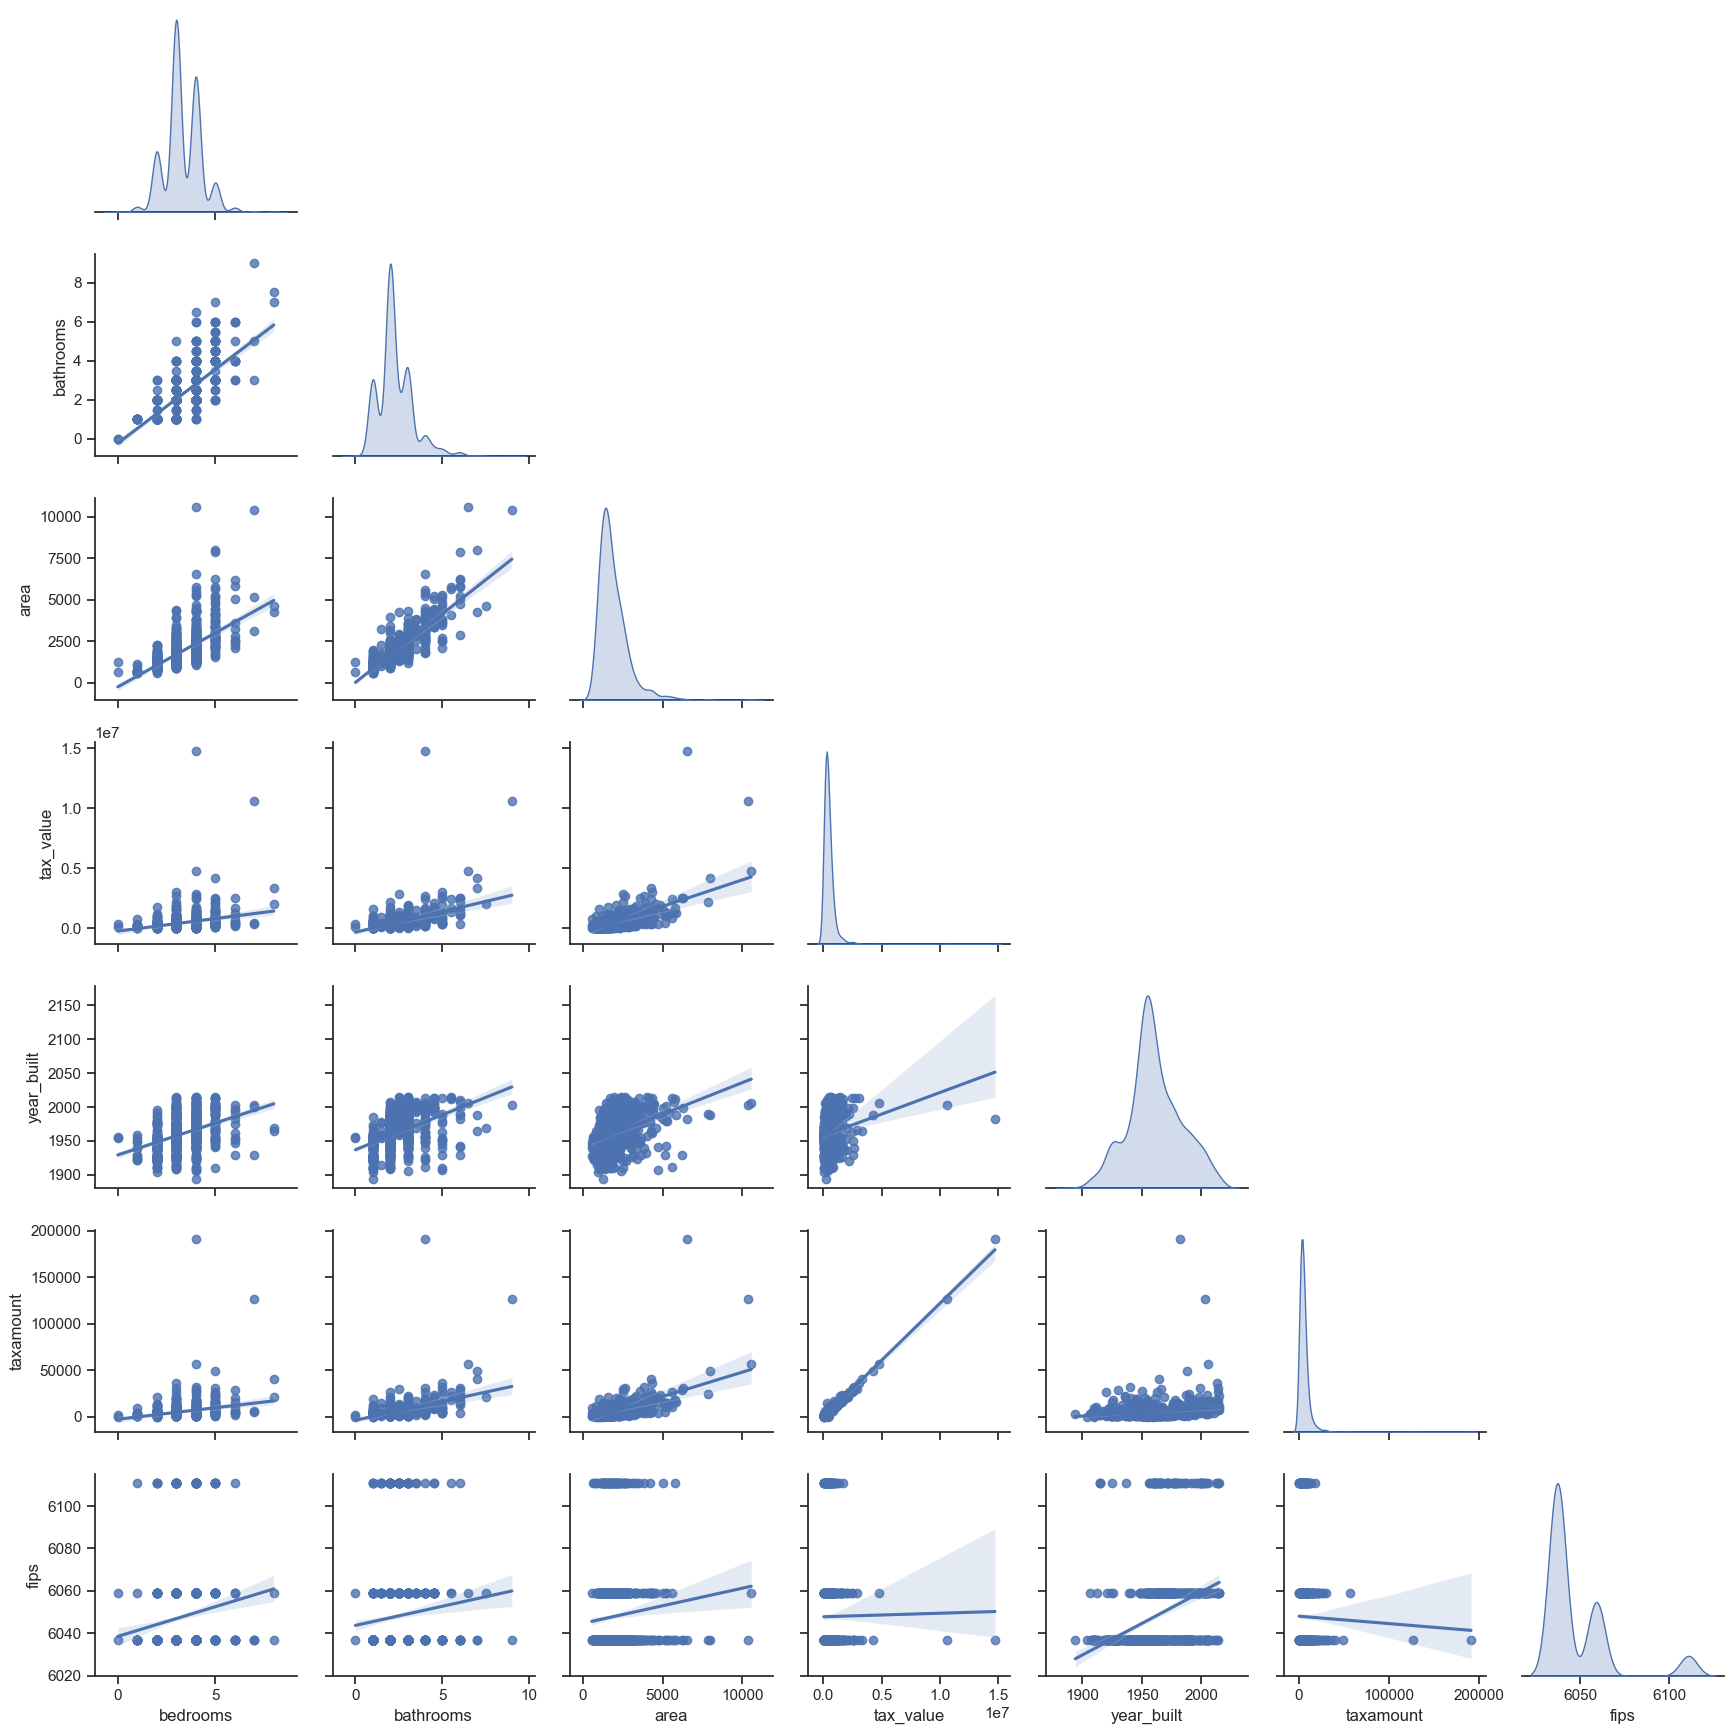

In [9]:
plot_variable_pairs(train_sample)

<div class="alert alert-block alert-info">

9. Run the appropriate statistical tests where needed.


In [10]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1007466,3,2.0,1452,241012,1980,2974.81,6037
615622,3,2.0,1262,235630,1953,3029.22,6037
662507,3,1.0,1447,435123,1947,5226.67,6037
840040,3,2.0,1403,268770,1965,2849.62,6111
243798,3,2.0,1456,365000,1961,4582.48,6037


#### Area and Value

##### Does area have a correlation with tax_value?

H0: There is no relationship between Area and Value

H1: There is a relationship between Area and Value

In [13]:
r, p = stats.spearmanr(train.area, train.tax_value)
r, p

(0.5232042204919063, 0.0)

In [23]:
alpha = 0.05

if p < alpha:
    print(f"{p:e}")
    print('Reject the null.')
    
else:
    print(f"{p:e}")
    print('Fail to reject the null.')

0.000000e+00
Reject the null.


#### Bedrooms and Value

##### Does bedrooms have a relationship with tax_value?

H0: There is no relationship between Bedrooms and Value

H1: There is a relationship between Bedrooms and Value

In [24]:
r, p = stats.spearmanr(train.bedrooms, train.tax_value)
r, p
alpha = 0.05

if p < alpha:
    print(f"{p:e}")
    print('Reject the null.')
    
else:
    print(f"{p:e}")
    print('Fail to reject the null.')

0.000000e+00
Reject the null.


<div class="alert alert-block alert-info">

10. What independent variables are correlated with the dependent variable, home value?


Tax taxamount seems to be highly correlated to tax_value. Then Bathroom and Are are also correlated.

In [19]:
pearson_matrix = train.corr()['tax_value'].sort_values(ascending=False)
pearson_matrix

tax_value     1.000000
taxamount     0.991078
bathrooms     0.501371
area          0.449737
bedrooms      0.256545
year_built    0.189819
fips          0.017876
Name: tax_value, dtype: float64

In [21]:
spearman_matrix = train.corr(method='spearman')['tax_value'].sort_values(ascending=False)
spearman_matrix

tax_value     1.000000
taxamount     0.978596
area          0.523204
bathrooms     0.482194
bedrooms      0.295988
year_built    0.290571
fips          0.150717
Name: tax_value, dtype: float64

<div class="alert alert-block alert-info">

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?


In [33]:
# create the index and column names of the dataframe which will save the correlation results
correlation_results = pd.DataFrame(index=train.columns, columns=train.columns)

#loop each variable agains every variable
for col1 in train.columns:
    for col2 in train.columns:
        # Compute the correlation between col1 and col2
        correlation = train[col1].corr(train[col2])
        
        # Store the correlation value in the results DataFrame
        correlation_results.loc[col1, col2] = correlation

# Convert the correlation matrix to a string with left-aligned values
correlation_str = correlation_results.applymap(lambda x: str(round(x, 4)).ljust(10))

# Print the entire correlation matrix with left-aligned values
with pd.option_context('display.max_columns', None, 'display.expand_frame_repr', False):
    print(correlation_str)


              bedrooms   bathrooms        area   tax_value  year_built   taxamount        fips
bedrooms    1.0         0.642       0.4449      0.2565      0.3759      0.2574      0.1363    
bathrooms   0.642       1.0         0.6142      0.5014      0.5092      0.5013      0.0977    
area        0.4449      0.6142      1.0         0.4497      0.3232      0.448       0.0712    
tax_value   0.2565      0.5014      0.4497      1.0         0.1898      0.9911      0.0179    
year_built  0.3759      0.5092      0.3232      0.1898      1.0         0.1911      0.3015    
taxamount   0.2574      0.5013      0.448       0.9911      0.1911      1.0         -0.0054   
fips        0.1363      0.0977      0.0712      0.0179      0.3015      -0.0054     1.0       


<div class="alert alert-block alert-info">

12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.


<div class="alert alert-block alert-info">

13. Explore your dataset with any other visualizations you think will be helpful.